# Using Diffractio

## Tutorials from Docs

[Diffractio docs](https://diffractio.readthedocs.io/).

### X fields

1D Rayleigh Sommerfeld

number of processors: 8
total memory        : 7.8 Gb
available memory    : 32 %
max frequency       : 2112 GHz
Good result: factor 25.88


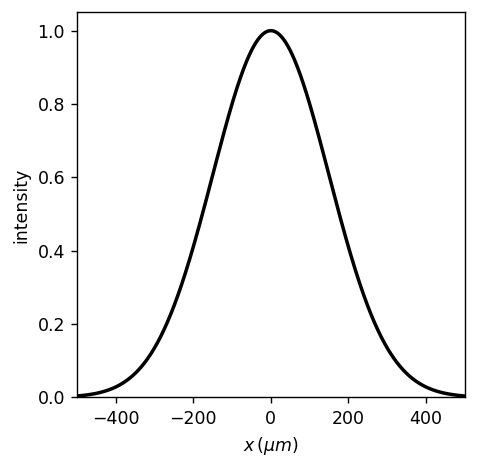

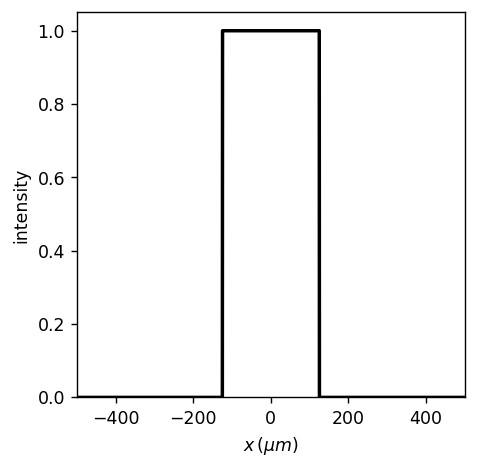

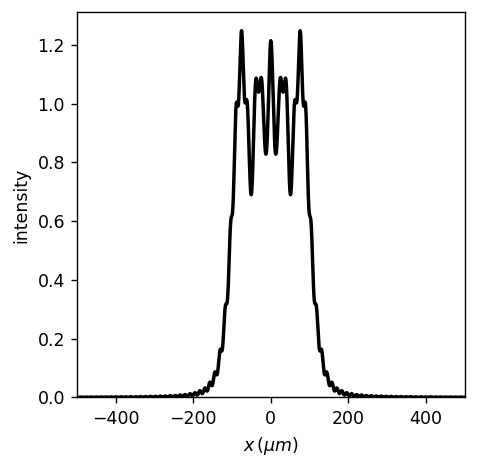

In [1]:
from diffractio import um, nm, mm, np
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

x = np.linspace(-500 * um, 500 * um, 4096)
wavelength = .6328 * um

u0 = Scalar_source_X(x, wavelength)
u0.gauss_beam(x0=0, w0=300*um, z0=0)
u0.draw(filename='x_source.png')

t0=Scalar_mask_X(x, wavelength)
t0.slit(x0=0, size=250*um)
t0.draw(filename='x_mask.png')

u1=t0*u0
u2 = u1.RS(z=5 * mm, new_field=True)
u2.draw(filename='x_RS.png')

### XZ fields

The one I'm interested in?

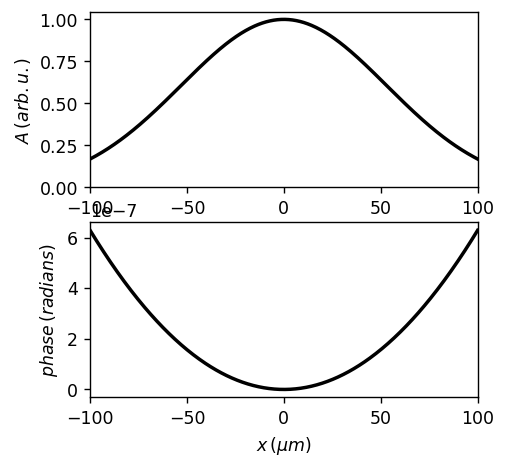

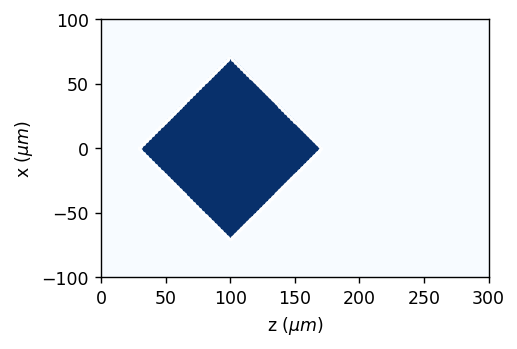

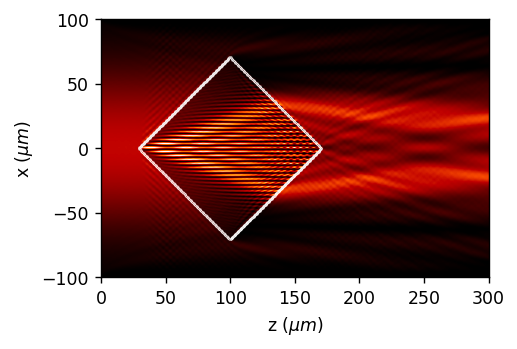

In [2]:
from diffractio import um, nm, mm, np,degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 300 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=75 * um, theta=0 * degrees)
u0.draw(kind='field', filename='x_source.png')

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(
  r0=(0 * um, 100 * um),
  size=(100 * um, 100 * um),
  angle=45 * degrees,
  refraction_index=2)

u1.draw_refraction_index(filename='xz_mask.png', scale='scaled')
u1.WPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, filename='xz_WPM.png', scale='scaled');

### XY fields

Jumped

### XYZ fields

Maybe I'll need this one.

screeninfo not imported.
time in RS= 11.916672468185425. num proc= 4


TypeError: draw_XYZ() got an unexpected keyword argument 'y0'

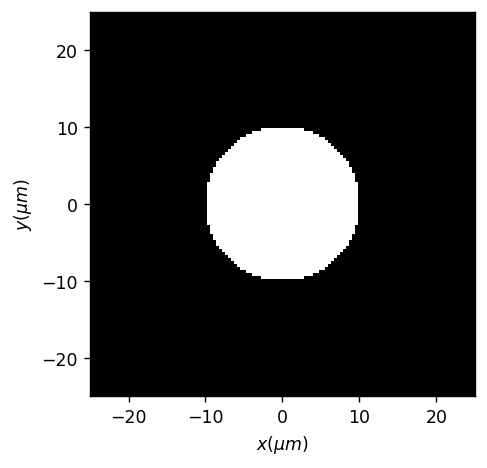

In [3]:
from diffractio import degrees, eps, mm, no_date, np, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

x0 = np.linspace(-25 * um, 25 * um, 128)
y0 = np.linspace(-25 * um, 25 * um, 128)
z0 = np.linspace(100 * um, 500 * um, 256)
wavelength = .6328 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(10 * um, 10 * um), angle=0 * degrees)
t1.draw(filename='xyz_mask.png')

uxyz = Scalar_mask_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(u0=t1)

uxyz.RS(verbose=True, num_processors=4)

uxyz.draw_XYZ(y0=0 * mm, logarithm=True, normalize='maximum',filename='xyz_cut.png')

### From Tutorial XZ



In [ ]:
from diffractio import degrees, eps, mm, np, num_max_processors, plt,sp, um
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X
from matplotlib import rcParams
rcParams['figure.figsize']=[8,6]
rcParams['figure.dpi']=125
%matplotlib tk

# Simulation of a sphere located at the origin. When the illumination comes from a point source, the location of it is 
# determined by z_sphere and the angle_sphere.

L = 90 * mm   # distance from source to sensor (not used yet)
z_sphere = 30 * mm  # distance from the point source to the z-plane where the sphere is.
radius_sphere = 30 * um
n_sphere = 1.333
angle_sphere = 0  # angle between z-axis and source-sphere axis, in degrees

dz = 0.26 * um
Nz = 8192 # 4096
z0 = -50 * um  # Start of plane for calculation
# x0 = np.linspace(-300 * um, 300 * um, 2048)
x0 = np.linspace(-150 * um, 150 * um, 1024)
zs = np.linspace(z0, z0+(Nz-1)*dz, Nz)
wavelength = 0.532 * um

# Instance of a field
# u1 = Scalar_field_XZ(x=x0, z=zs, wavelength=wavelength)

# The source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
# u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)
# x_point_source = np.tan(np.radians(angle_sphere)) * z_sphere
# u0.spherical_wave(A=1, x0=-x_point_source, z0=-z_sphere, normalize=True)
# plt.plot(np.abs(u0.u))
"""
# u = amplitude * A * exp(-1.j * sign(z0) * k * Rz) / R
A (float) – maximum amplitude
x0 (float) – x position of source
z0 (float) – z position of source
mask (bool) – If true, masks the spherical wave with radius
radius (float) – size of slit for mask
normalize (bool) – If True, maximum of field is 1
"""

# The sphere (changing n)
u1 = Scalar_mask_XZ(x=x0, z=zs, wavelength=wavelength, n_background=1.0)
u1.incident_field(u0)

"""
pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=300 * um, radius=50 * um)
center = (pn['cx'], pn['cz'])
radius = pn['radius']
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)
u1.sphere(
    r0=center, radius=(radius, radius), refraction_index=ref_index, angle=0)
"""

spheres_r0 = ((0, 0))
# ((-50*um, 0), (30*um, 24*radius_sphere), (110*um, 10*radius_sphere), (-130*um, 6*radius_sphere))

for r0 in spheres_r0:
    u1.sphere(
        r0=r0,
        radius=(radius_sphere, radius_sphere),
        refraction_index=n_sphere)

"""
sphere(r0, radius, refraction_index, angle=0, rotation_point=None)
r0 (float, float) – (x0,z0) Location of the rectangle, for example (0 * um, 20 * um)
radius (float, float) – radius x,y of the sphere (ellipsoid)
refraction_index (float, str) – refraction index , for example: 1.5 + 1.0j
angle (float) – angle of rotation of the semi-plane, in radians
rotation_point (float, float) –
"""

u1.draw_refraction_index(
    draw_borders=False, scale='scaled');

# Propagation
edges = u1.surface_detection()
u1.WPM(verbose=False)

# Drawings
u1.draw(
    logarithm=True, normalize='maximum', draw_borders=True, edge_matrix=edges, scale='scaled');

# x_max, z_max = u1.search_focus()
# u1.profile_longitudinal(x0=0 * um);
# u1.profile_transversal(z0=z_max);

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib tk

# Photonic jet EFL for illumination with planar wave or point source
h = np.linspace(5e-3, 50e-3, 100)[:, np.newaxis]  # distances from point source to the sphere
a = np.array([[25e-6, 50e-6, 150e-6]])  # radius of the sphere
n = 1.333  # index of refraction

EFL_planar = n * a / 2 / (n - 1)
EFL_spherical = h / (2*h/a - 1 - 2*h/(a*n))

fig, axs = plt.subplots(2, 1)
axs[1].plot(h*1e3, EFL_spherical/EFL_planar)
axs[1].legend([f'{2*radius*1e6:.0f} um' for radius in a[0]])
axs[1].set_ylabel('EFL_spherical/EFL_planar')
axs[1].set_xlabel('Distance from point source [mm]')

axs[0].plot(h*1e3, EFL_spherical*1e6)
axs[0].legend([f'{2*radius*1e6:.0f} um' for radius in a[0]])
axs[0].set_ylabel('EFL_spherical [um]')
axs[0].set_xlabel('Distance from point source [mm]')

## Tutorial Wave Propagation Method (XYZ)

Time = 3.69 s, time/loop = 23.65 ms
Process time = 3.72 s


<IPython.core.display.Javascript object>


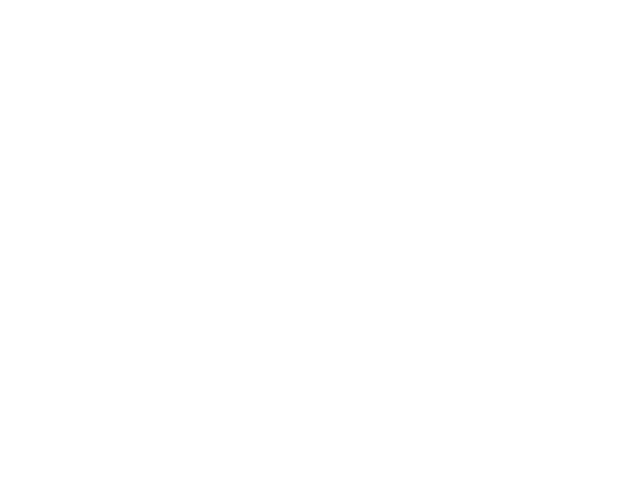

<IPython.core.display.Javascript object>


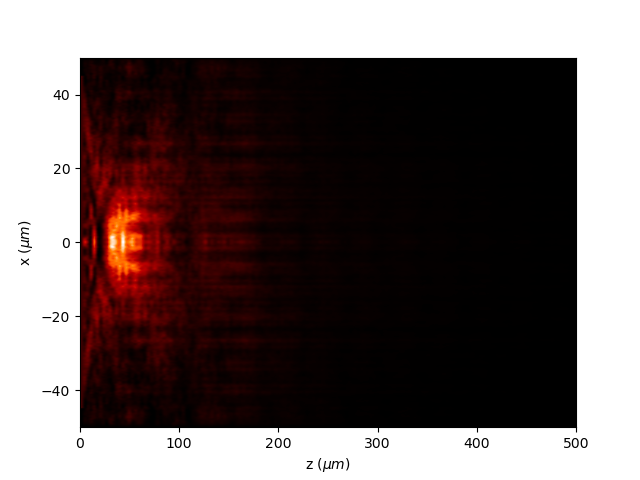

In [3]:
from diffractio import np, plt, sp, um, mm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

import time
%matplotlib notebook

# Propagation at vacuum
x = np.linspace(-50 * um, 50 * um, 256)
y = np.linspace(-50 * um, 50 * um, 256)
z = np.linspace(300, 500 * um, 156)
z[0] = 0
wavelength = .6 * um

t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0, 0), radius=45 * um, angle=0)

u = Scalar_mask_XYZ(x, y, z, wavelength)
u.incident_field(u0=t0)

t0_ = time.time()
u.clear_field()
u.WPM(verbose=True, has_edges=True)
print(f'Process time = {time.time()-t0_:.2f} s')

u.draw_XZ(y0=0, logarithm=False)